In [1]:
import pandas as pd
import viewser

from views_dataviz.dumbbell import plot_dumbbell

In [2]:
?plot_dumbbell

Signature:
plot_dumbbell(
    df: pandas.core.frame.DataFrame,
    current: str,
    previous: str,
    labels: str,
    axislabel: str,
    title: str,
    orientation: str = 'vertical',
    markersize: int = 100,
    markercolors: Tuple[int, int] = ('black', 'red'),
    linecolor: str = 'grey',
    lims: Optional[Tuple[int, int]] = None,
    pad: float = 0.2,
    figsize: Tuple[float, float] = (10.0, 12.0),
    legend_kwds: Optional[Dict] = None,
    ascending: bool = False,
    path: Optional[str] = None,
)
Docstring:
Plots vertical or horizontal dumbbell chart for selected deltas.

Args:
    df: pd.DataFrame containing the current and previous series.
    current: Column name of current series.
    previous: Column name of previous series.
    labels: Column name of associated labels.
    axislabel: Label to give to the axis (x for vertical, y for horizontal).
    title: Title to the figure.
    orientation: String for orientation: "vertical" or "horizontal".
    markersize: Size o

In [3]:
import viewser
import sqlalchemy as sa
import pandas as pd
from ingester3.config import source_db_path

In [4]:
engine = sa.create_engine(source_db_path)
country = pd.read_sql(
    "SELECT id as country_id, name FROM prod.country",
    con=engine
).set_index("country_id")

# Fetch some example data.
df = viewser.operations.fetch("hh_fatalities_ged_acled")

# Join in countrynames and make the xlabel.
df = df.join(country)

In [5]:
# Prepare a lag to compare to.
df["ln_acled_sb_lag"] = df["ln_acled_sb"].groupby(level=1).shift(1)
df["delta"] = df["ln_acled_sb"] - df["ln_acled_sb_lag"]
df = df.sort_values(by="delta", ascending=False)

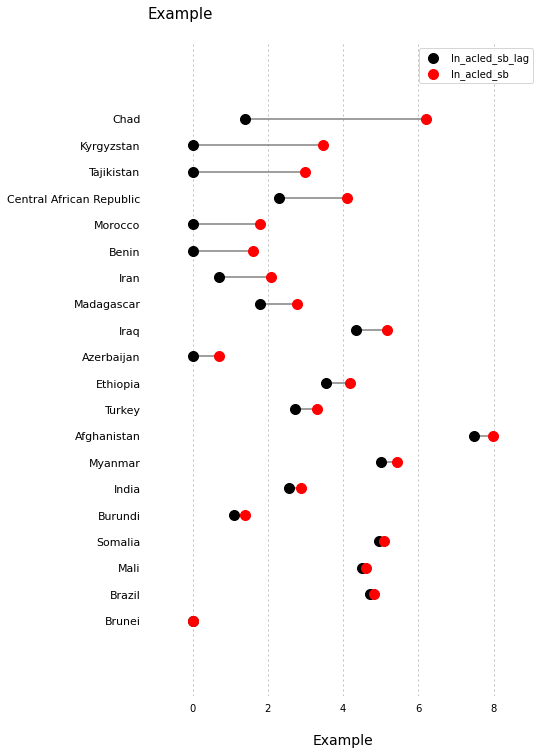

In [6]:
plot_dumbbell(
    df=df.loc[496].reset_index()[0:20],  # Taking the 20 biggest deltas.
    current="ln_acled_sb", 
    previous="ln_acled_sb_lag", 
    labels="name", 
    orientation="vertical", 
    axislabel="Example", 
    title="Example", 
    figsize=(7,12),
    ascending=True,
    pad=0.15
)